In [1]:
import deepchem as dc
from rdkit import Chem

In [3]:
tasks, datasets, transformers = dc.molnet.load_delaney(featurizer='GraphConv')
#train_dataset, valid_dataset, test_dataset = datasets
#this dataset contains information about solubility, which is a measure
#of how easily molecule dissolves in water

ValueError: No Metadata Found On Disk

In [9]:
train_dataset.X.shape, train_dataset.y.shape, valid_dataset.X.shape, test_dataset.X.shape

((902,), (902, 1), (113,), (113,))

In [12]:
model = dc.models.GraphConvModel(n_tasks=1, mode='regression', dropout=0.2)
model.fit(train_dataset, nb_epoch=100)

TypeError: in converted code:
    relative to /opt/anaconda3/envs/molpredtf/lib/python3.7/site-packages:

    deepchem/models/keras_model.py:510 apply_gradient_for_batch  *
        grads = tape.gradient(batch_loss, vars)
    tensorflow_core/python/eager/backprop.py:1014 gradient
        unconnected_gradients=unconnected_gradients)
    tensorflow_core/python/eager/imperative_grad.py:76 imperative_grad
        compat.as_str(unconnected_gradients.value))
    tensorflow_core/python/eager/backprop.py:138 _gradient_function
        return grad_fn(mock_op, *out_grads)
    tensorflow_core/python/ops/math_grad.py:455 _UnsortedSegmentMaxGrad
        return _UnsortedSegmentMinOrMaxGrad(op, grad)
    tensorflow_core/python/ops/math_grad.py:432 _UnsortedSegmentMinOrMaxGrad
        _GatherDropNegatives(op.outputs[0], op.inputs[1])

    TypeError: 'NoneType' object is not subscriptable


In [14]:
from rdkit import Chem
from rdkit.Chem.Draw import MolsToGridImage

smiles_list = ["CCCCC","CCOCC","CCNCC","CCSCC"]
mol_list = [Chem.MolFromSmiles(x) for x in smiles_list]

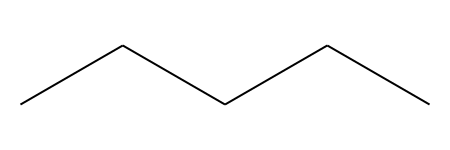

In [16]:
mol_list[0]

In [17]:
import deepchem as dc
featurizer = dc.feat.RdkitGridFeaturizer(
        voxel_width=2.0, sanitize=True, flatten=True,
        feature_types=['hbond', 'salt_bridge', 'pi_stack',
                       'cation_pi', 'ecfp', 'splif'])

In [18]:
tasks, datasets, transformers = dc.molnet.load_pdbbind(
        featurizer=featurizer, splitter="random", subset="core")
train_dataset, valid_dataset, test_dataset = datasets

Failed to featurize datapoint 0. Appending empty array.
Failed to featurize datapoint 1. Appending empty array.
Failed to featurize datapoint 2. Appending empty array.
Failed to featurize datapoint 3. Appending empty array.
Failed to featurize datapoint 4. Appending empty array.
Failed to featurize datapoint 5. Appending empty array.
Failed to featurize datapoint 6. Appending empty array.
Failed to featurize datapoint 7. Appending empty array.
Failed to featurize datapoint 8. Appending empty array.
Failed to featurize datapoint 9. Appending empty array.
Failed to featurize datapoint 10. Appending empty array.
Failed to featurize datapoint 11. Appending empty array.
Failed to featurize datapoint 12. Appending empty array.
Failed to featurize datapoint 13. Appending empty array.
Failed to featurize datapoint 14. Appending empty array.
Failed to featurize datapoint 15. Appending empty array.
Failed to featurize datapoint 16. Appending empty array.
Failed to featurize datapoint 17. Appendi

Failed to featurize datapoint 144. Appending empty array.
Failed to featurize datapoint 145. Appending empty array.
Failed to featurize datapoint 146. Appending empty array.
Failed to featurize datapoint 147. Appending empty array.
Failed to featurize datapoint 148. Appending empty array.
Failed to featurize datapoint 149. Appending empty array.
Failed to featurize datapoint 150. Appending empty array.
Failed to featurize datapoint 151. Appending empty array.
Failed to featurize datapoint 152. Appending empty array.
Failed to featurize datapoint 153. Appending empty array.
Failed to featurize datapoint 154. Appending empty array.
Failed to featurize datapoint 155. Appending empty array.
Failed to featurize datapoint 156. Appending empty array.
Failed to featurize datapoint 157. Appending empty array.
Failed to featurize datapoint 158. Appending empty array.
Failed to featurize datapoint 159. Appending empty array.
Failed to featurize datapoint 160. Appending empty array.
Failed to feat

In [19]:
from sklearn.ensemble import RandomForestRegressor
sklearn_model = RandomForestRegressor(n_estimators=100)
model = dc.models.SklearnModel(sklearn_model)
model.fit(train_dataset)

In [20]:
n_features = train_dataset.X.shape[1]
model = dc.models.MultitaskRegressor(
        n_tasks=len(tasks),
        n_features=n_features,
        layer_sizes=[2000, 1000],
        dropouts=0.5,
        learning_rate=0.0003)
model.fit(train_dataset, nb_epoch=50)

2.4263673400878907